# Exploratory Data Analysis for Fraud Detection

This notebook performs comprehensive exploratory data analysis on the fraudTest.csv dataset to understand patterns, distributions, and characteristics that can help in fraud detection.

## Objectives:
1. **Data Overview**: Understand the structure and basic statistics of the dataset
2. **Data Quality Assessment**: Check for missing values, duplicates, and data types
3. **Target Variable Analysis**: Analyze the distribution of fraudulent vs legitimate transactions
4. **Feature Analysis**: Explore individual features and their relationships with fraud
5. **Temporal Analysis**: Examine time-based patterns in fraud occurrence
6. **Correlation Analysis**: Identify relationships between features
7. **Visualizations**: Create insightful plots for better understanding

---

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Initial Data Exploration

In [2]:
# Load the dataset
print("Loading fraudTest.csv...")
df = pd.read_csv('fraudTest.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display basic information
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]:,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loading fraudTest.csv...
Dataset loaded successfully!
Shape: (555719, 23)
Memory usage: 443.58 MB

DATASET OVERVIEW
Number of rows: 555,719
Number of columns: 23
Memory usage: 443.58 MB


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\n" + "="*50)
print("COLUMN INFORMATION")
print("="*50)
print(f"Columns: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)

print("\n" + "="*50)
print("DATASET INFO")
print("="*50)
df.info()

First 5 rows of the dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             

In [4]:
# Clean up the dataset
print("DATASET CLEANUP")
print("="*50)

# Remove the unnamed index column (doesn't add value to analysis)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("✓ Removed 'Unnamed: 0' column (redundant index)")

print(f"✓ Dataset shape after cleanup: {df.shape}")

# Explain key columns for fraud detection context
print("\nKEY COLUMN EXPLANATIONS")
print("="*50)
column_explanations = {
    'amt': 'Transaction amount (crucial for fraud detection)',
    'is_fraud': 'Target variable (1=fraud, 0=legitimate)',
    'trans_date_trans_time': 'Transaction timestamp',
    'cc_num': 'Credit card number',
    'merchant': 'Merchant name',
    'category': 'Transaction category',
    'lat/long': 'Customer location coordinates',
    'merch_lat/merch_long': 'Merchant location coordinates'
}

for col, explanation in column_explanations.items():
    if any(c in df.columns for c in col.split('/')):
        print(f"• {col}: {explanation}")

print(f"\nUpdated columns ({len(df.columns)}): {list(df.columns)}")

DATASET CLEANUP
✓ Removed 'Unnamed: 0' column (redundant index)
✓ Dataset shape after cleanup: (555719, 22)

KEY COLUMN EXPLANATIONS
• amt: Transaction amount (crucial for fraud detection)
• is_fraud: Target variable (1=fraud, 0=legitimate)
• trans_date_trans_time: Transaction timestamp
• cc_num: Credit card number
• merchant: Merchant name
• category: Transaction category
• lat/long: Customer location coordinates
• merch_lat/merch_long: Merchant location coordinates

Updated columns (22): ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


## 3. Data Quality Assessment

In [5]:
# Check for missing values
print("MISSING VALUES ANALYSIS")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of complete rows: {(len(df) - df.isnull().any(axis=1).sum()) / len(df) * 100:.2f}%")

MISSING VALUES ANALYSIS
No missing values found in the dataset!

Total missing values: 0
Percentage of complete rows: 100.00%


In [6]:
# Check for duplicates
print("\nDUPLICATE VALUES ANALYSIS")
print("="*50)
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}")
print(f"Percentage of duplicate rows: {(total_duplicates / len(df)) * 100:.2f}%")

if total_duplicates > 0:
    print("\nFirst few duplicate rows:")
    print(df[df.duplicated()].head())

# Basic statistics for numeric columns
print("\nBASIC STATISTICS")
print("="*50)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols:
    print("Numeric columns:", numeric_cols)
    print("\nDescriptive statistics:")
    print(df[numeric_cols].describe())


DUPLICATE VALUES ANALYSIS
Total duplicate rows: 0
Percentage of duplicate rows: 0.00%

BASIC STATISTICS
Numeric columns: ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Descriptive statistics:
             cc_num            amt            zip            lat  \
count  5.557190e+05  555719.000000  555719.000000  555719.000000   
mean   4.178387e+17      69.392810   48842.628015      38.543253   
std    1.309837e+18     156.745941   26855.283328       5.061336   
min    6.041621e+10       1.000000    1257.000000      20.027100   
25%    1.800429e+14       9.630000   26292.000000      34.668900   
50%    3.521417e+15      47.290000   48174.000000      39.371600   
75%    4.635331e+15      83.010000   72011.000000      41.894800   
max    4.992346e+18   22768.110000   99921.000000      65.689900   

                long      city_pop     unix_time      merch_lat  \
count  555719.000000  5.557190e+05  5.557190e+05  555719.000000   
me

## 4. Target Variable Analysis (Fraud Distribution)

In [7]:
# Identify the target column (assuming it's named 'is_fraud', 'fraud', 'isFraud', or similar)
target_candidates = [col for col in df.columns if 'fraud' in col.lower() or 'target' in col.lower()]
print("Potential target columns:", target_candidates)

# If no obvious target column, let's examine the columns to identify the target
if not target_candidates:
    print("\nAll columns in the dataset:")
    for i, col in enumerate(df.columns, 1):
        unique_vals = df[col].nunique()
        print(f"{i:2d}. {col:<20} - {df[col].dtype} - {unique_vals} unique values")
        if unique_vals <= 10:  # Show unique values for columns with few unique values
            print(f"    Unique values: {df[col].unique()}")
        print()

# For demonstration, let's assume the target column exists and analyze it
# You may need to modify this based on the actual column name in your dataset
if target_candidates:
    target_col = target_candidates[0]
    print(f"Using '{target_col}' as the target variable")
    
    # Fraud distribution
    fraud_counts = df[target_col].value_counts()
    fraud_percentages = df[target_col].value_counts(normalize=True) * 100
    
    print("\nFRAUD DISTRIBUTION")
    print("="*50)
    print("Count distribution:")
    print(fraud_counts)
    print("\nPercentage distribution:")
    for value, percentage in fraud_percentages.items():
        print(f"{value}: {percentage:.2f}%")
    
    print(f"\nClass imbalance ratio: 1:{fraud_counts.iloc[0] / fraud_counts.iloc[1]:.1f}")
else:
    print("\nPlease identify the target column manually after examining the data structure above.")

Potential target columns: ['is_fraud']
Using 'is_fraud' as the target variable

FRAUD DISTRIBUTION
Count distribution:
is_fraud
0    553574
1      2145
Name: count, dtype: int64

Percentage distribution:
0: 99.61%
1: 0.39%

Class imbalance ratio: 1:258.1


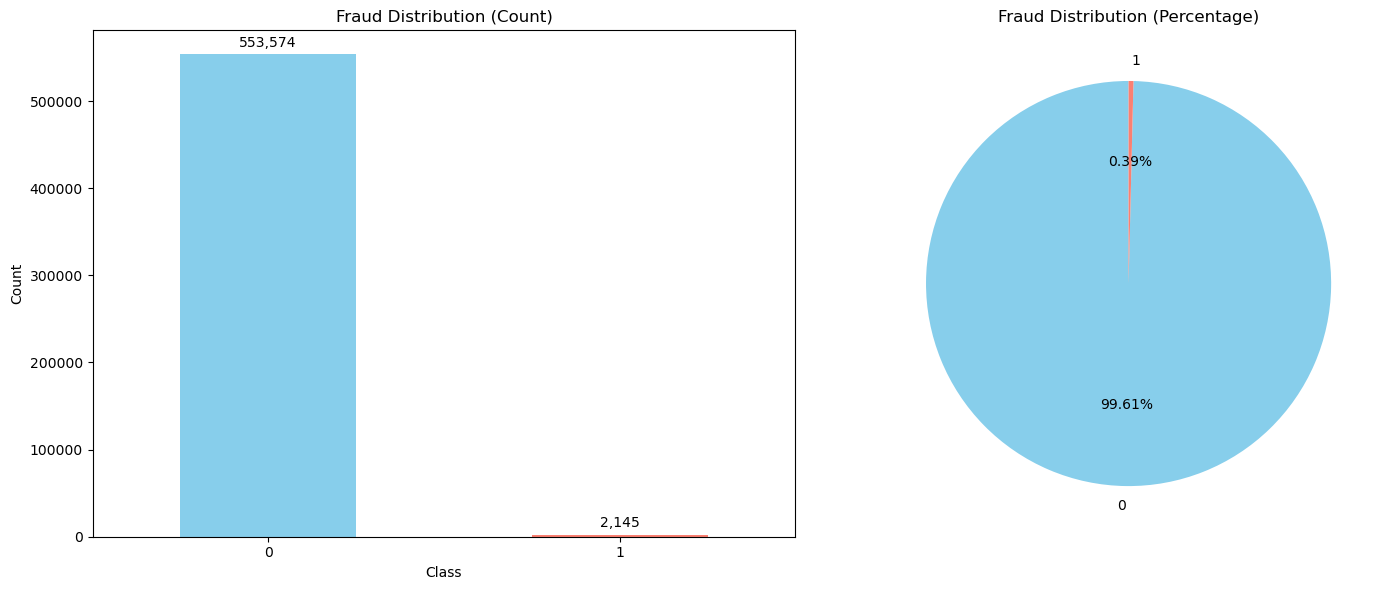

In [8]:
# Visualization of fraud distribution (modify target_col as needed)
if 'target_col' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Count plot
    fraud_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
    axes[0].set_title('Fraud Distribution (Count)')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Add count labels on bars
    for i, v in enumerate(fraud_counts.values):
        axes[0].text(i, v + max(fraud_counts.values)*0.01, f'{v:,}', ha='center', va='bottom')
    
    # Pie chart
    axes[1].pie(fraud_counts.values, labels=fraud_counts.index, autopct='%1.2f%%', 
                colors=['skyblue', 'salmon'], startangle=90)
    axes[1].set_title('Fraud Distribution (Percentage)')
    
    plt.tight_layout()
    plt.show()
    
    # Interactive plotly visualization
    fig_plotly = px.bar(x=fraud_counts.index, y=fraud_counts.values, 
                        title='Fraud Distribution', 
                        labels={'x': 'Class', 'y': 'Count'},
                        color=fraud_counts.index,
                        text=fraud_counts.values)
    fig_plotly.update_traces(texttemplate='%{text:,}', textposition='outside')
    fig_plotly.show()
else:
    print("Please define the target column to create visualizations.")

MONETARY VALUE ANALYSIS
💰 TOTAL MONETARY VALUES:
   • Fraudulent transactions: $1,133,324.68 (2.94%)
   • Legitimate transactions: $37,429,578.43 (97.06%)
   • Total transaction value: $38,562,903.11

📊 COUNT vs VALUE COMPARISON:
   • By Transaction Count:
     - Fraud: 0.39% of transactions
     - Legitimate: 99.61% of transactions
   • By Monetary Value:
     - Fraud: 2.94% of total value
     - Legitimate: 97.06% of total value

🎯 FRAUD IMPACT ANALYSIS:
   • Value Impact Ratio: 7.61
   • Fraud transactions represent 7.6x more value than their count proportion
   • Average fraud transaction value is HIGHER than average legitimate transaction

💵 AVERAGE TRANSACTION AMOUNTS:
   • Average fraudulent transaction: $528.36
   • Average legitimate transaction: $67.61
   • Difference: $460.74
   • Fraud transactions are 7.81x larger on average


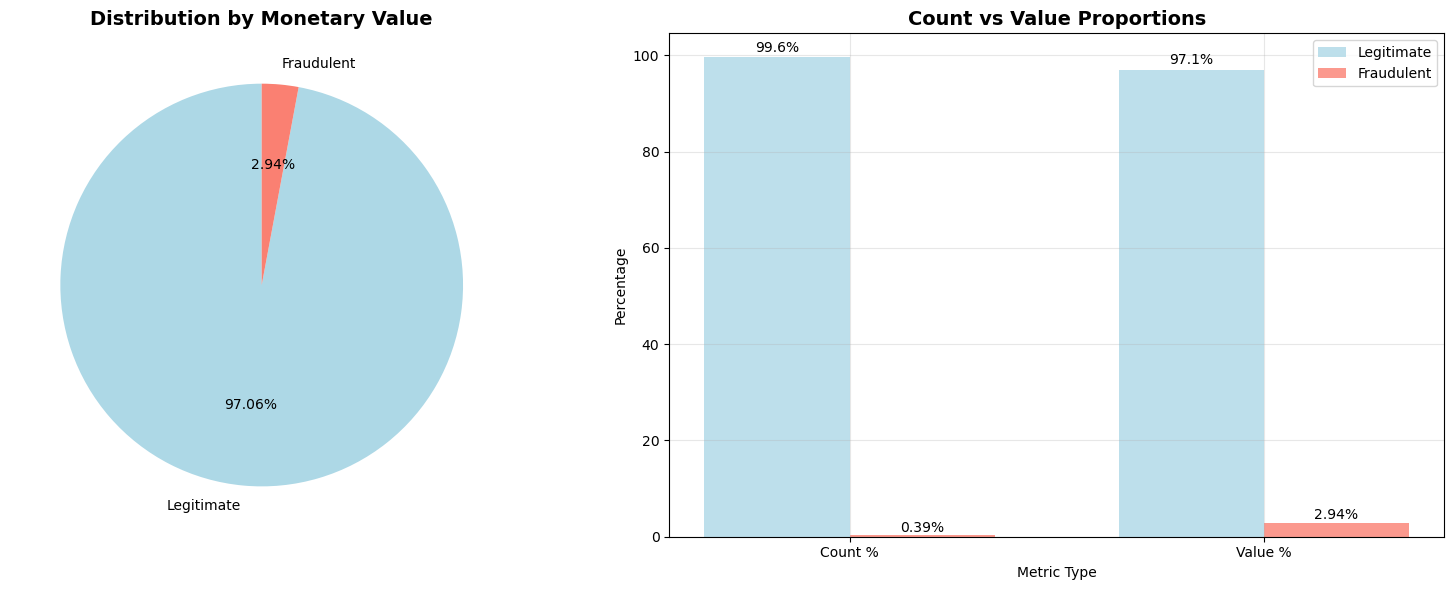


💡 KEY MONETARY INSIGHTS:
   • While fraud represents only 0.39% of transactions,
     it accounts for 2.94% of total monetary value
   • ⚠️  HIGH-VALUE FRAUD ALERT: Fraudsters target larger transactions!
   • Total financial impact of fraud: $1,133,324.68
   • This analysis helps prioritize fraud prevention strategies! 🎯


In [9]:
# Monetary Value Analysis: Fraud vs Legitimate Transactions
print("MONETARY VALUE ANALYSIS")
print("="*60)

if 'target_col' in locals():
    # Calculate total monetary values
    total_fraud_value = df[df[target_col] == 1]['amt'].sum()
    total_legit_value = df[df[target_col] == 0]['amt'].sum()
    total_value = df['amt'].sum()
    
    fraud_value_percentage = (total_fraud_value / total_value) * 100
    legit_value_percentage = (total_legit_value / total_value) * 100
    
    print(f"💰 TOTAL MONETARY VALUES:")
    print(f"   • Fraudulent transactions: ${total_fraud_value:,.2f} ({fraud_value_percentage:.2f}%)")
    print(f"   • Legitimate transactions: ${total_legit_value:,.2f} ({legit_value_percentage:.2f}%)")
    print(f"   • Total transaction value: ${total_value:,.2f}")
    
    # Compare with transaction counts
    fraud_count_percentage = df[target_col].mean() * 100
    legit_count_percentage = 100 - fraud_count_percentage
    
    print(f"\n📊 COUNT vs VALUE COMPARISON:")
    print(f"   • By Transaction Count:")
    print(f"     - Fraud: {fraud_count_percentage:.2f}% of transactions")
    print(f"     - Legitimate: {legit_count_percentage:.2f}% of transactions")
    print(f"   • By Monetary Value:")
    print(f"     - Fraud: {fraud_value_percentage:.2f}% of total value")
    print(f"     - Legitimate: {legit_value_percentage:.2f}% of total value")
    
    # Calculate the impact ratio
    value_impact_ratio = fraud_value_percentage / fraud_count_percentage
    print(f"\n🎯 FRAUD IMPACT ANALYSIS:")
    print(f"   • Value Impact Ratio: {value_impact_ratio:.2f}")
    if value_impact_ratio > 1:
        print(f"   • Fraud transactions represent {value_impact_ratio:.1f}x more value than their count proportion")
        print(f"   • Average fraud transaction value is HIGHER than average legitimate transaction")
    elif value_impact_ratio < 1:
        print(f"   • Fraud transactions represent {1/value_impact_ratio:.1f}x less value than their count proportion")
        print(f"   • Average fraud transaction value is LOWER than average legitimate transaction")
    else:
        print(f"   • Fraud transactions represent proportional value to their count")
    
    # Calculate average transaction amounts
    avg_fraud_amount = df[df[target_col] == 1]['amt'].mean()
    avg_legit_amount = df[df[target_col] == 0]['amt'].mean()
    
    print(f"\n💵 AVERAGE TRANSACTION AMOUNTS:")
    print(f"   • Average fraudulent transaction: ${avg_fraud_amount:.2f}")
    print(f"   • Average legitimate transaction: ${avg_legit_amount:.2f}")
    print(f"   • Difference: ${avg_fraud_amount - avg_legit_amount:.2f}")
    
    if avg_fraud_amount > avg_legit_amount:
        multiplier = avg_fraud_amount / avg_legit_amount
        print(f"   • Fraud transactions are {multiplier:.2f}x larger on average")
    else:
        multiplier = avg_legit_amount / avg_fraud_amount
        print(f"   • Fraud transactions are {1/multiplier:.2f}x smaller on average")

    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Pie chart for monetary values
    values = [total_legit_value, total_fraud_value]
    labels = ['Legitimate', 'Fraudulent']
    colors = ['lightblue', 'salmon']
    
    axes[0].pie(values, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90)
    axes[0].set_title('Distribution by Monetary Value', fontsize=14, fontweight='bold')
    
    # Bar chart comparing proportions
    categories = ['Count %', 'Value %']
    fraud_proportions = [fraud_count_percentage, fraud_value_percentage]
    legit_proportions = [legit_count_percentage, legit_value_percentage]
    
    x = np.arange(len(categories))
    width = 0.35
    
    axes[1].bar(x - width/2, legit_proportions, width, label='Legitimate', color='lightblue', alpha=0.8)
    axes[1].bar(x + width/2, fraud_proportions, width, label='Fraudulent', color='salmon', alpha=0.8)
    
    axes[1].set_xlabel('Metric Type')
    axes[1].set_ylabel('Percentage')
    axes[1].set_title('Count vs Value Proportions', fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(categories)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, (legit_val, fraud_val) in enumerate(zip(legit_proportions, fraud_proportions)):
        axes[1].text(i - width/2, legit_val + 0.5, f'{legit_val:.1f}%', ha='center', va='bottom')
        axes[1].text(i + width/2, fraud_val + 0.02, f'{fraud_val:.2f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Key insights
    print(f"\n💡 KEY MONETARY INSIGHTS:")
    print(f"   • While fraud represents only {fraud_count_percentage:.2f}% of transactions,")
    print(f"     it accounts for {fraud_value_percentage:.2f}% of total monetary value")
    
    if fraud_value_percentage > fraud_count_percentage:
        print(f"   • ⚠️  HIGH-VALUE FRAUD ALERT: Fraudsters target larger transactions!")
    elif fraud_value_percentage < fraud_count_percentage:
        print(f"   • 💡 LOW-VALUE FRAUD PATTERN: Fraudsters prefer smaller amounts (harder to detect)")
    
    print(f"   • Total financial impact of fraud: ${total_fraud_value:,.2f}")
    print(f"   • This analysis helps prioritize fraud prevention strategies! 🎯")
    
else:
    print("Please define the target column to perform monetary value analysis.")

## 5. Feature Analysis

In [10]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target column from features if identified
if 'target_col' in locals() and target_col in numerical_features:
    numerical_features.remove(target_col)
elif 'target_col' in locals() and target_col in categorical_features:
    categorical_features.remove(target_col)

print("FEATURE CATEGORIZATION")
print("="*50)
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")

# Display unique value counts for categorical features
print("\nCATEGORICAL FEATURES ANALYSIS")
print("="*50)
for feature in categorical_features[:10]:  # Show first 10 to avoid clutter
    unique_count = df[feature].nunique()
    print(f"{feature}: {unique_count} unique values")
    if unique_count <= 20:  # Show values for features with few categories
        print(f"  Values: {list(df[feature].value_counts().head(10).index)}")
    print()

FEATURE CATEGORIZATION
Numerical features (9): ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
Categorical features (12): ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']

CATEGORICAL FEATURES ANALYSIS
trans_date_trans_time: 544760 unique values

merchant: 693 unique values

category: 14 unique values
  Values: ['gas_transport', 'grocery_pos', 'home', 'shopping_pos', 'kids_pets', 'shopping_net', 'entertainment', 'personal_care', 'food_dining', 'health_fitness']

first: 341 unique values

last: 471 unique values

gender: 2 unique values
  Values: ['F', 'M']

street: 924 unique values

city: 849 unique values

state: 50 unique values

job: 478 unique values



NUMERICAL FEATURES DISTRIBUTION
Analyzing 2 meaningful numerical features...
Excluded from histograms: geographic coordinates and identifier features
Meaningful features: ['amt', 'city_pop']
Excluded features: ['cc_num', 'zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long']


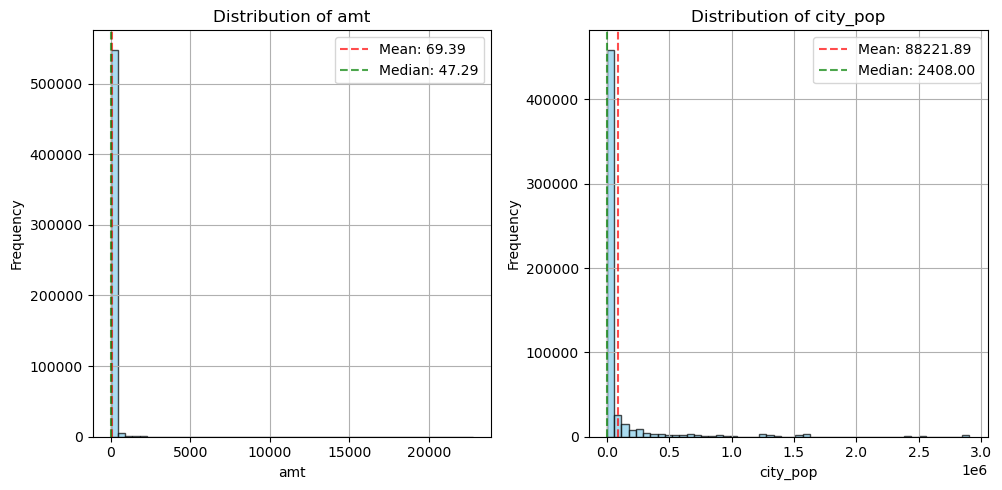


Statistical Summary of Non-Geographic Numerical Features:
             amt    city_pop
count  555719.00   555719.00
mean       69.39    88221.89
std       156.75   300390.89
min         1.00       23.00
25%         9.63      741.00
50%        47.29     2408.00
75%        83.01    19685.00
max     22768.11  2906700.00


In [11]:
# Distribution analysis for numerical features
if numerical_features:
    print("NUMERICAL FEATURES DISTRIBUTION")
    print("="*50)
    
    # Exclude geographic coordinates and identifier features from histogram analysis
    geo_columns = ['lat', 'long', 'latitude', 'longitude', 'merch_lat', 'merch_long']
    identifier_columns = ['cc_num', 'zip', 'unix_time']  # These are identifiers/codes, not meaningful distributions
    exclude_columns = geo_columns + identifier_columns
    
    features_for_hist = [f for f in numerical_features if not any(col in f.lower() for col in exclude_columns)]
    
    print(f"Analyzing {len(features_for_hist)} meaningful numerical features...")
    print(f"Excluded from histograms: geographic coordinates and identifier features")
    print(f"Meaningful features: {features_for_hist}")
    print(f"Excluded features: {[f for f in numerical_features if f not in features_for_hist]}")
    
    # Create subplots for histograms (excluding geographic coordinates)
    if features_for_hist:
        n_features = min(len(features_for_hist), 8)  # Limit to 8 for readability
        fig, axes = plt.subplots(nrows=(n_features + 3) // 4, ncols=4, figsize=(20, 5 * ((n_features + 3) // 4)))
        axes = axes.flatten() if n_features > 1 else [axes]
        
        for i, feature in enumerate(features_for_hist[:n_features]):
            if i < len(axes):
                df[feature].hist(bins=50, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
                axes[i].set_title(f'Distribution of {feature}')
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel('Frequency')
                
                # Add basic statistics
                mean_val = df[feature].mean()
                median_val = df[feature].median()
                axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
                axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
                axes[i].legend()
        
        # Hide empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
        
        # Statistical summary (excluding geographic coordinates for clarity)
        print("\nStatistical Summary of Non-Geographic Numerical Features:")
        print(df[features_for_hist[:10]].describe().round(2))  # Show first 10 features

GEOGRAPHIC VISUALIZATION
Found geographic features: ['lat', 'long', 'merch_lat', 'merch_long']
Using 5000 samples for map visualization...



Distance Analysis:
Average distance between customer and merchant: 75.04 km
Median distance: 77.90 km
Max distance: 138.76 km


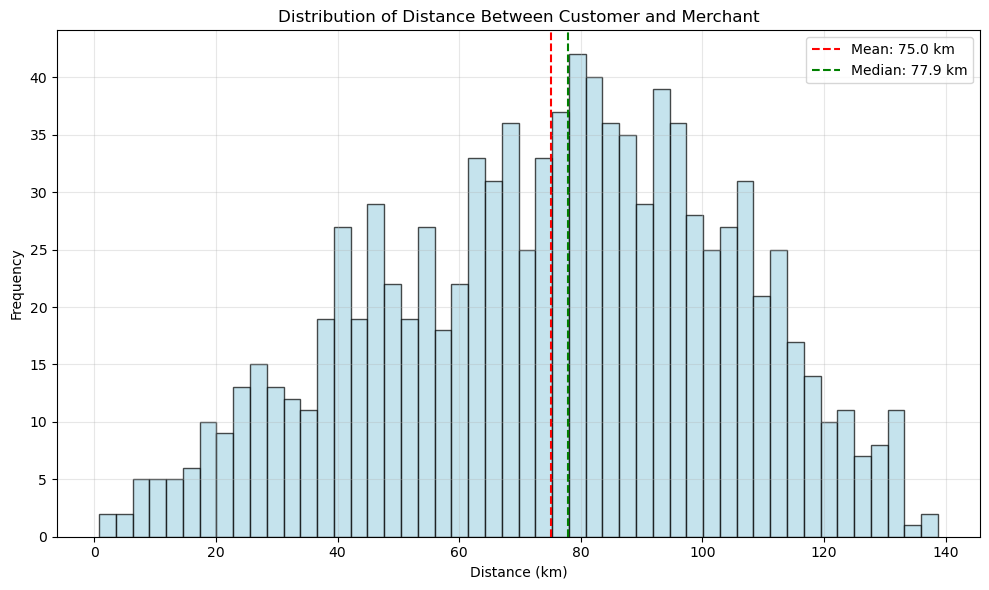

In [12]:
# Geographic visualization and analysis
if numerical_features:
    geo_columns = ['lat', 'long', 'latitude', 'longitude', 'merch_lat', 'merch_long']
    geo_features_found = [f for f in numerical_features if any(geo in f.lower() for geo in geo_columns)]
    
    if geo_features_found:
        print("GEOGRAPHIC VISUALIZATION")
        print("="*50)
        print(f"Found geographic features: {geo_features_found}")
        
        # Check if we have customer and merchant coordinates
        has_customer_coords = 'lat' in df.columns and 'long' in df.columns
        has_merchant_coords = 'merch_lat' in df.columns and 'merch_long' in df.columns
        
        if has_customer_coords or has_merchant_coords:
            # Sample data for performance (maps can be slow with large datasets)
            sample_size = min(5000, len(df))
            df_geo_sample = df.sample(n=sample_size, random_state=42)
            print(f"Using {sample_size} samples for map visualization...")
            
            # Create map visualizations
            if has_customer_coords:
                # Customer locations map
                fig_customer = px.scatter_mapbox(df_geo_sample,
                                               lat='lat', lon='long',
                                               color='is_fraud' if 'target_col' in locals() else None,
                                               hover_data=['amt'] if 'amt' in df.columns else None,
                                               title='Customer Transaction Locations',
                                               mapbox_style="open-street-map",
                                               height=600,
                                               zoom=3)
                fig_customer.update_layout(title_x=0.5)
                fig_customer.show()
            
            if has_merchant_coords:
                # Merchant locations map
                fig_merchant = px.scatter_mapbox(df_geo_sample,
                                               lat='merch_lat', lon='merch_long',
                                               color='is_fraud' if 'target_col' in locals() else None,
                                               hover_data=['merchant', 'amt'] if all(col in df.columns for col in ['merchant', 'amt']) else None,
                                               title='Merchant Locations',
                                               mapbox_style="open-street-map",
                                               height=600,
                                               zoom=3)
                fig_merchant.update_layout(title_x=0.5)
                fig_merchant.show()
                
            # Distance analysis if both coordinates available
            if has_customer_coords and has_merchant_coords:
                print("\nDistance Analysis:")
                # Calculate distance between customer and merchant
                from math import radians, cos, sin, asin, sqrt
                
                def haversine_distance(lat1, lon1, lat2, lon2):
                    """Calculate the great circle distance between two points on earth (in km)"""
                    # Convert decimal degrees to radians
                    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
                    
                    # Haversine formula
                    dlat = lat2 - lat1
                    dlon = lon2 - lon1
                    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                    c = 2 * asin(sqrt(a))
                    r = 6371  # Radius of earth in kilometers
                    return c * r
                
                # Calculate distances for a sample
                sample_distances = []
                for idx, row in df_geo_sample.head(1000).iterrows():  # Sample for performance
                    dist = haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long'])
                    sample_distances.append(dist)
                
                print(f"Average distance between customer and merchant: {np.mean(sample_distances):.2f} km")
                print(f"Median distance: {np.median(sample_distances):.2f} km")
                print(f"Max distance: {np.max(sample_distances):.2f} km")
                
                # Create distance distribution plot
                plt.figure(figsize=(10, 6))
                plt.hist(sample_distances, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
                plt.title('Distribution of Distance Between Customer and Merchant')
                plt.xlabel('Distance (km)')
                plt.ylabel('Frequency')
                plt.axvline(np.mean(sample_distances), color='red', linestyle='--', 
                           label=f'Mean: {np.mean(sample_distances):.1f} km')
                plt.axvline(np.median(sample_distances), color='green', linestyle='--', 
                           label=f'Median: {np.median(sample_distances):.1f} km')
                plt.legend()
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
    else:
        print("No geographic features found for mapping visualization.")

MEANINGFUL NUMERICAL FEATURES BY FRAUD STATUS
Analyzing 2 meaningful features:
  • amt: Transaction amount (key fraud indicator)
  • city_pop: City population (urban vs rural patterns)


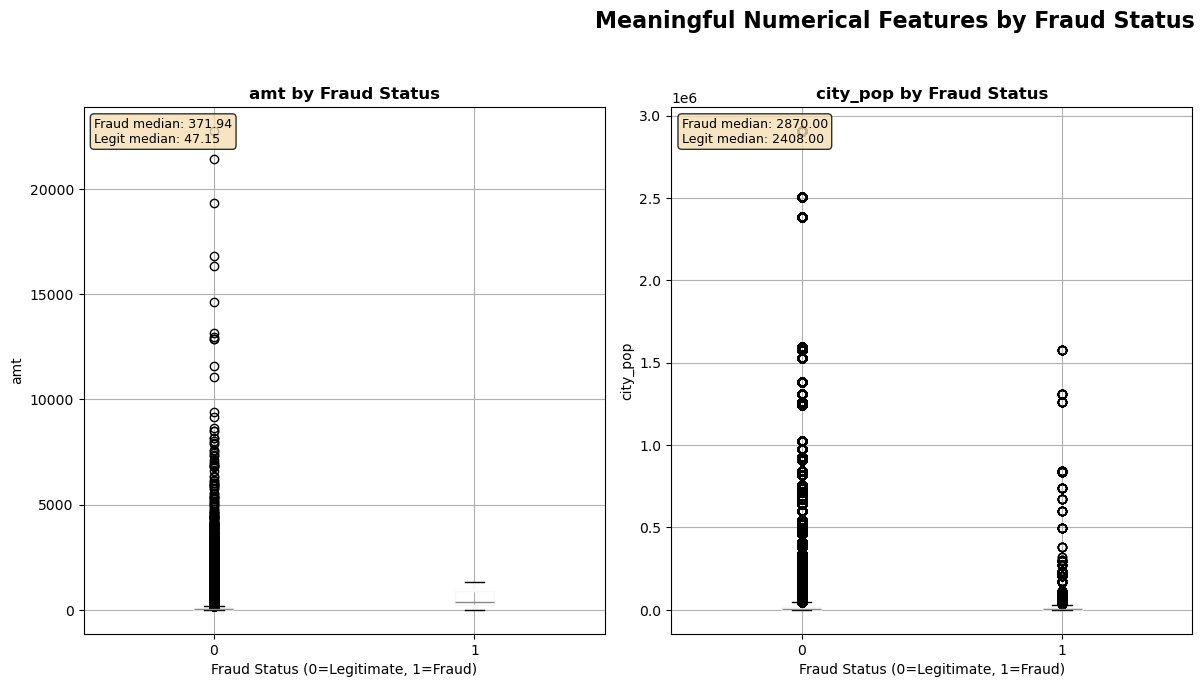


KEY INSIGHTS:
------------------------------

AMT:
  Fraud:      Mean=528.36, Median=371.94
  Legitimate: Mean=67.61, Median=47.15
  → Fraud transactions tend to have HIGHER amounts

CITY_POP:
  Fraud:      Mean=64529.32, Median=2870.00
  Legitimate: Mean=88313.69, Median=2408.00
  → Fraud occurs more in SMALLER cities

TOP CATEGORIES IN CATEGORICAL FEATURES

Top 10 categories in trans_date_trans_time:
trans_date_trans_time
2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
2020-12-12 02:47:10    3
2020-12-07 16:13:36    3
2020-09-15 00:07:37    3
2020-12-14 23:47:36    3
2020-12-07 13:35:07    3
Name: count, dtype: int64
Total unique categories: 544760

Top 10 categories in merchant:
merchant
fraud_Kilback LLC                 1859
fraud_Cormier LLC                 1597
fraud_Schumm PLC                  1561
fraud_Kuhn LLC                    1521
fraud_Dickinson Ltd               1519
fraud_Boyer PLC            

In [13]:
# Boxplots for meaningful numerical features by fraud status
if 'target_col' in locals() and numerical_features:
    print("MEANINGFUL NUMERICAL FEATURES BY FRAUD STATUS")
    print("="*50)
    
    # Select only meaningful features for fraud analysis
    # Exclude: identifiers (cc_num, zip), coordinates (lat, long, merch_lat, merch_long), 
    # unix_time (better handled in temporal analysis)
    exclude_features = ['cc_num', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'unix_time']
    meaningful_features = [f for f in numerical_features if f not in exclude_features]
    
    print(f"Analyzing {len(meaningful_features)} meaningful features:")
    for feature in meaningful_features:
        if feature == 'amt':
            print(f"  • {feature}: Transaction amount (key fraud indicator)")
        elif feature == 'city_pop':
            print(f"  • {feature}: City population (urban vs rural patterns)")
        else:
            print(f"  • {feature}: {feature}")
    
    if meaningful_features:
        n_features = min(len(meaningful_features), 6)
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
        axes = axes.flatten()
        
        for i, feature in enumerate(meaningful_features[:n_features]):
            if i < len(axes):
                df.boxplot(column=feature, by=target_col, ax=axes[i])
                axes[i].set_title(f'{feature} by Fraud Status', fontweight='bold')
                axes[i].set_xlabel('Fraud Status (0=Legitimate, 1=Fraud)')
                axes[i].set_ylabel(feature)
                
                # Add summary statistics
                fraud_median = df[df[target_col]==1][feature].median()
                legit_median = df[df[target_col]==0][feature].median()
                
                # Add text box with key stats
                stats_text = f'Fraud median: {fraud_median:.2f}\nLegit median: {legit_median:.2f}'
                axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                           verticalalignment='top', bbox=dict(boxstyle='round', 
                           facecolor='wheat', alpha=0.8), fontsize=9)
        
        # Hide empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle('Meaningful Numerical Features by Fraud Status', y=1.02, fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Print summary insights
        print("\nKEY INSIGHTS:")
        print("-" * 30)
        for feature in meaningful_features[:3]:  # Show top 3
            fraud_stats = df[df[target_col]==1][feature].agg(['mean', 'median', 'std'])
            legit_stats = df[df[target_col]==0][feature].agg(['mean', 'median', 'std'])
            
            print(f"\n{feature.upper()}:")
            print(f"  Fraud:      Mean={fraud_stats['mean']:.2f}, Median={fraud_stats['median']:.2f}")
            print(f"  Legitimate: Mean={legit_stats['mean']:.2f}, Median={legit_stats['median']:.2f}")
            
            if feature == 'amt':
                if fraud_stats['mean'] > legit_stats['mean']:
                    print("  → Fraud transactions tend to have HIGHER amounts")
                else:
                    print("  → Fraud transactions tend to have LOWER amounts")
            elif feature == 'city_pop':
                if fraud_stats['mean'] > legit_stats['mean']:
                    print("  → Fraud occurs more in LARGER cities")
                else:
                    print("  → Fraud occurs more in SMALLER cities")
    else:
        print("No meaningful numerical features found for boxplot analysis.")

# Categorical features analysis
if categorical_features:
    print("\nTOP CATEGORIES IN CATEGORICAL FEATURES")
    print("="*50)
    
    for feature in categorical_features[:5]:  # Show first 5 categorical features
        print(f"\nTop 10 categories in {feature}:")
        top_categories = df[feature].value_counts().head(10)
        print(top_categories)
        print(f"Total unique categories: {df[feature].nunique()}")

## 6. Temporal Analysis

In [14]:
# Identify potential date/time columns
date_candidates = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in ['date', 'time', 'timestamp', 'created', 'trans']):
        date_candidates.append(col)

print("TEMPORAL ANALYSIS")
print("="*50)
print("Potential date/time columns:", date_candidates)

# If date columns exist, perform temporal analysis
if date_candidates:
    # Try to convert the first date column to datetime
    date_col = date_candidates[0]
    
    try:
        # Create a copy of the date column and try to convert
        df_temp = df.copy()
        df_temp[f'{date_col}_datetime'] = pd.to_datetime(df_temp[date_col], errors='coerce')
        
        if df_temp[f'{date_col}_datetime'].notna().sum() > 0:
            print(f"\nSuccessfully converted '{date_col}' to datetime")
            print(f"Date range: {df_temp[f'{date_col}_datetime'].min()} to {df_temp[f'{date_col}_datetime'].max()}")
            
            # Extract temporal features
            df_temp['year'] = df_temp[f'{date_col}_datetime'].dt.year
            df_temp['month'] = df_temp[f'{date_col}_datetime'].dt.month
            df_temp['day'] = df_temp[f'{date_col}_datetime'].dt.day
            df_temp['hour'] = df_temp[f'{date_col}_datetime'].dt.hour
            df_temp['day_of_week'] = df_temp[f'{date_col}_datetime'].dt.day_name()
            
            # Fraud patterns by time if target exists
            if 'target_col' in locals():
                print("\\nFraud patterns by temporal features:")
                
                # Fraud by hour of day
                hourly_fraud = df_temp.groupby('hour')[target_col].agg(['count', 'sum', 'mean']).round(4)
                hourly_fraud.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
                print("\\nFraud by Hour of Day (top 10):")
                print(hourly_fraud.sort_values('Fraud_Rate', ascending=False).head(10))
                
                # Fraud by day of week
                daily_fraud = df_temp.groupby('day_of_week')[target_col].agg(['count', 'sum', 'mean']).round(4)
                daily_fraud.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
                print("\\nFraud by Day of Week:")
                print(daily_fraud.sort_values('Fraud_Rate', ascending=False))
        else:
            print(f"Could not convert '{date_col}' to datetime format")
            
    except Exception as e:
        print(f"Error processing date column '{date_col}': {e}")
else:
    print("\\nNo obvious date/time columns found. Please manually specify if temporal analysis is needed.")
    print("\\nAll columns for reference:")
    for i, col in enumerate(df.columns, 1):
        print(f"{i:2d}. {col}")

TEMPORAL ANALYSIS
Potential date/time columns: ['trans_date_trans_time', 'trans_num', 'unix_time']

Successfully converted 'trans_date_trans_time' to datetime
Date range: 2020-06-21 12:14:25 to 2020-12-31 23:59:34
\nFraud patterns by temporal features:
\nFraud by Hour of Day (top 10):
      Total_Transactions  Fraud_Count  Fraud_Rate
hour                                             
22                 28388          550      0.0194
23                 28798          538      0.0187
3                  18199          194      0.0107
0                  18153          188      0.0104
2                  18140          168      0.0093
1                  18461          169      0.0092
20                 27983           36      0.0013
5                  17917           20      0.0011
18                 28001           30      0.0011
21                 28205           27      0.0010
\nFraud by Day of Week:
             Total_Transactions  Fraud_Count  Fraud_Rate
day_of_week                      

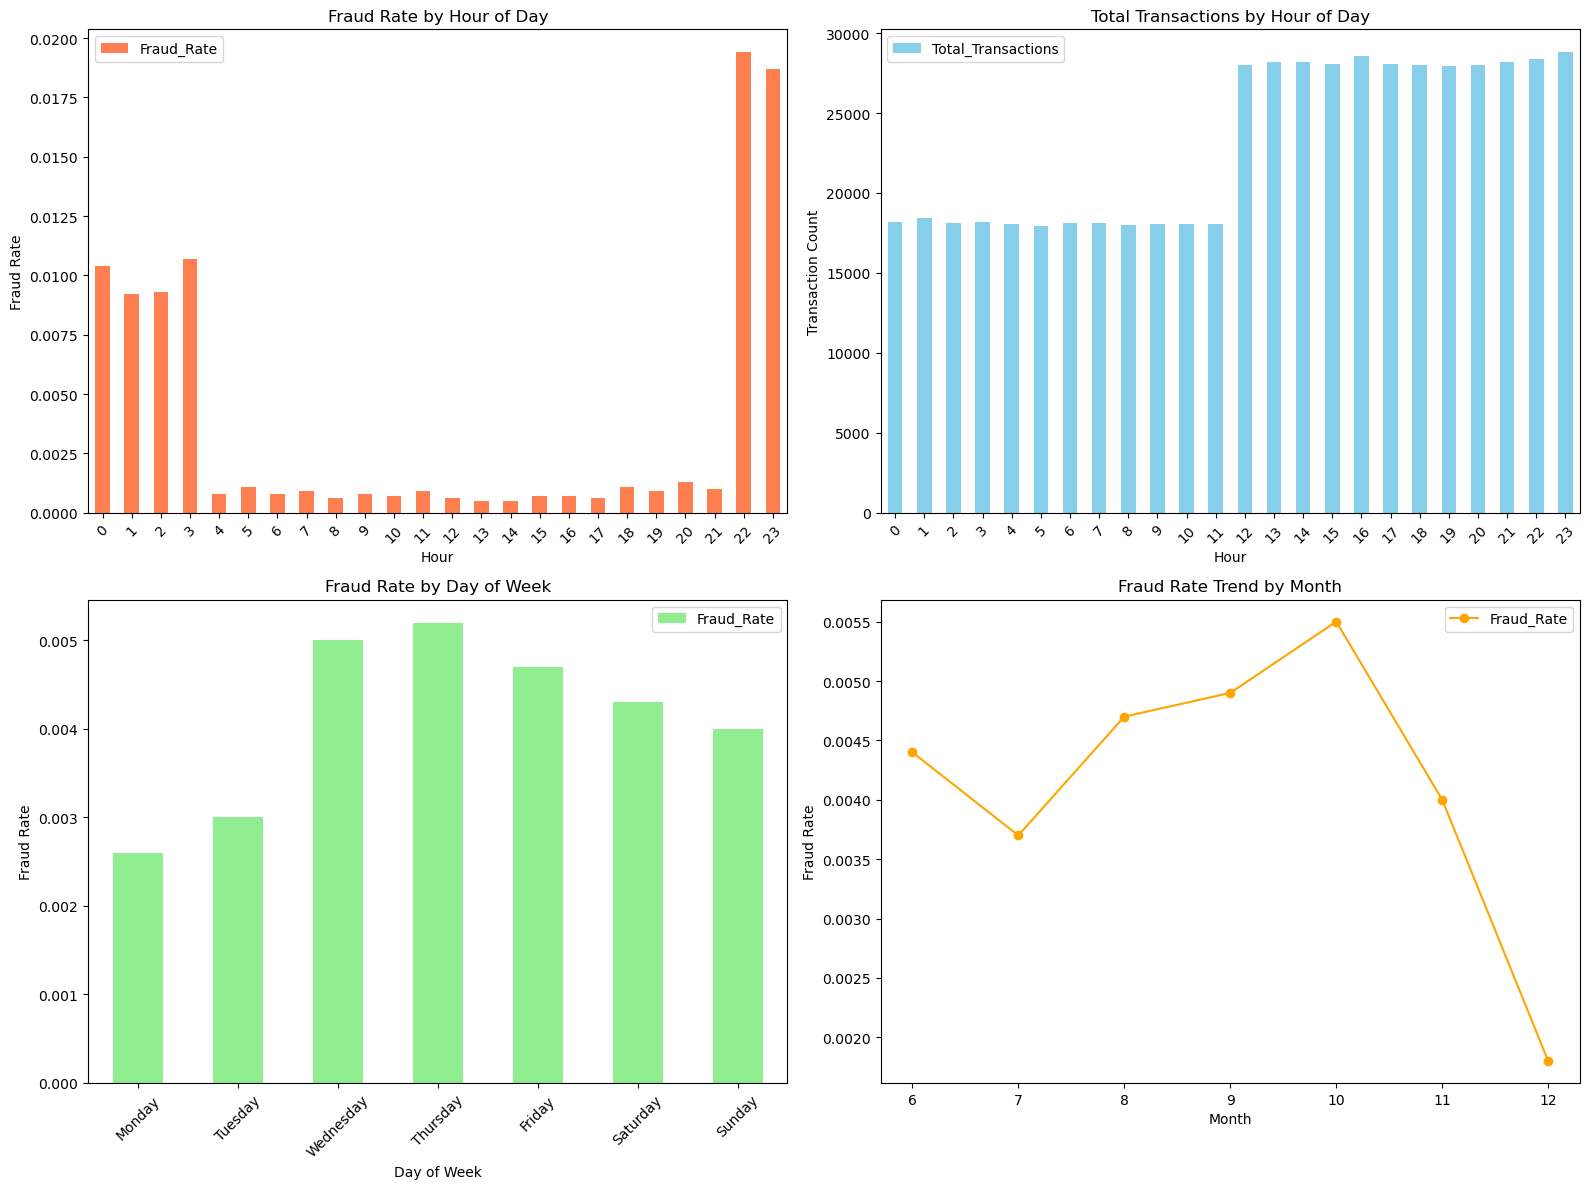

In [15]:
# Temporal visualizations (if datetime conversion was successful)
if 'df_temp' in locals() and f'{date_col}_datetime' in df_temp.columns and 'target_col' in locals():
    # Plot fraud rate by hour
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Fraud by hour
    hourly_fraud.plot(y='Fraud_Rate', kind='bar', ax=axes[0,0], color='coral')
    axes[0,0].set_title('Fraud Rate by Hour of Day')
    axes[0,0].set_xlabel('Hour')
    axes[0,0].set_ylabel('Fraud Rate')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Total transactions by hour
    hourly_fraud.plot(y='Total_Transactions', kind='bar', ax=axes[0,1], color='skyblue')
    axes[0,1].set_title('Total Transactions by Hour of Day')
    axes[0,1].set_xlabel('Hour')
    axes[0,1].set_ylabel('Transaction Count')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Fraud by day of week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_fraud_ordered = daily_fraud.reindex(day_order, fill_value=0)
    daily_fraud_ordered.plot(y='Fraud_Rate', kind='bar', ax=axes[1,0], color='lightgreen')
    axes[1,0].set_title('Fraud Rate by Day of Week')
    axes[1,0].set_xlabel('Day of Week')
    axes[1,0].set_ylabel('Fraud Rate')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Monthly trend (if data spans multiple months)
    if df_temp['month'].nunique() > 1:
        monthly_fraud = df_temp.groupby('month')[target_col].agg(['count', 'sum', 'mean']).round(4)
        monthly_fraud.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
        monthly_fraud.plot(y='Fraud_Rate', kind='line', ax=axes[1,1], color='orange', marker='o')
        axes[1,1].set_title('Fraud Rate Trend by Month')
        axes[1,1].set_xlabel('Month')
        axes[1,1].set_ylabel('Fraud Rate')
    else:
        axes[1,1].text(0.5, 0.5, 'Data spans single month\\nNo monthly trend available', 
                       ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12)
        axes[1,1].set_title('Monthly Trend (Not Available)')
    
    plt.tight_layout()
    plt.show()

## 7. Correlation Analysis

CORRELATION ANALYSIS


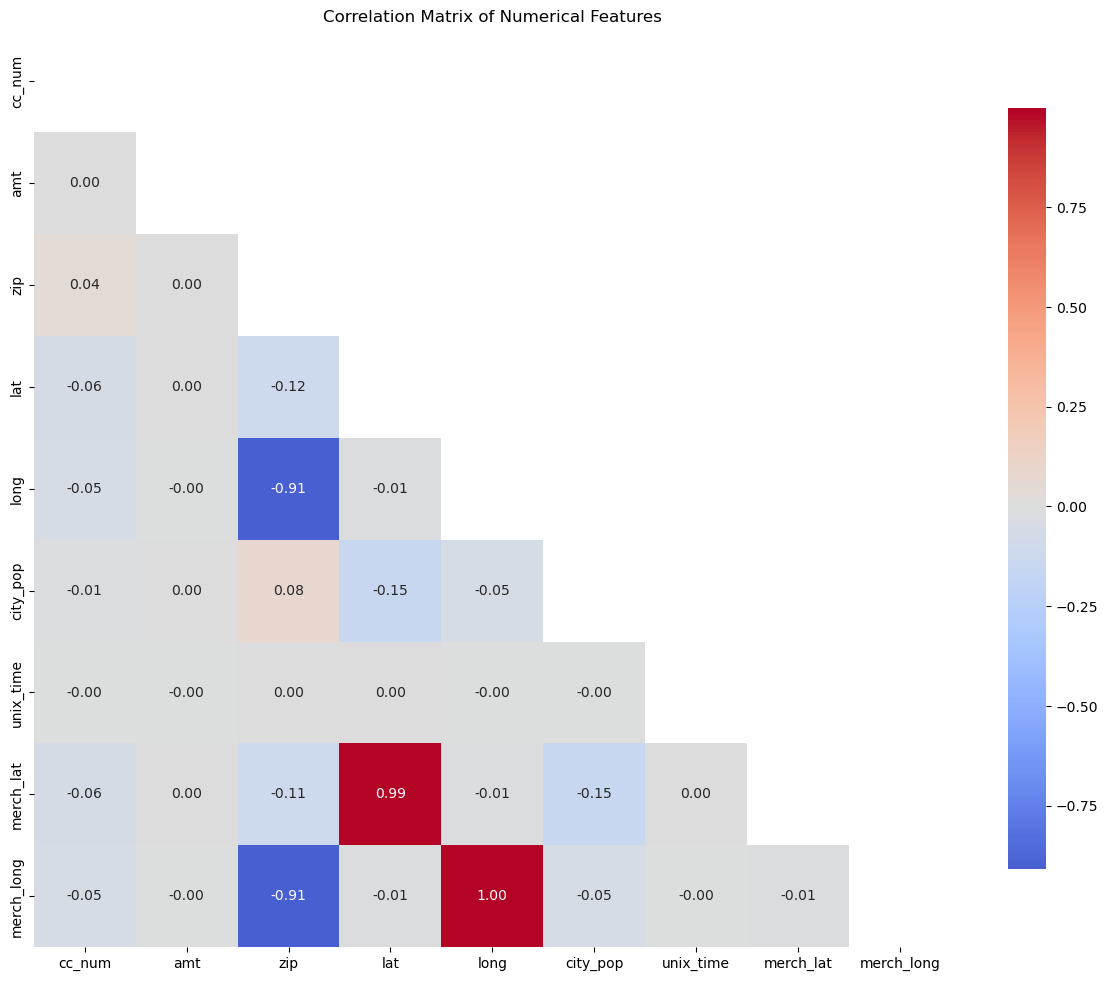

\nHighly Correlated Feature Pairs (|correlation| > 0.7):
long - merch_long: 0.999
lat - merch_lat: 0.994
zip - long: -0.910
zip - merch_long: -0.909
\nCorrelation with Target Variable (is_fraud):
amt           0.182267
unix_time    -0.013066
lat           0.005863
merch_lat     0.005812
city_pop     -0.004910
zip          -0.002271
cc_num       -0.001540
merch_long   -0.001060
long         -0.000972
Name: is_fraud, dtype: float64


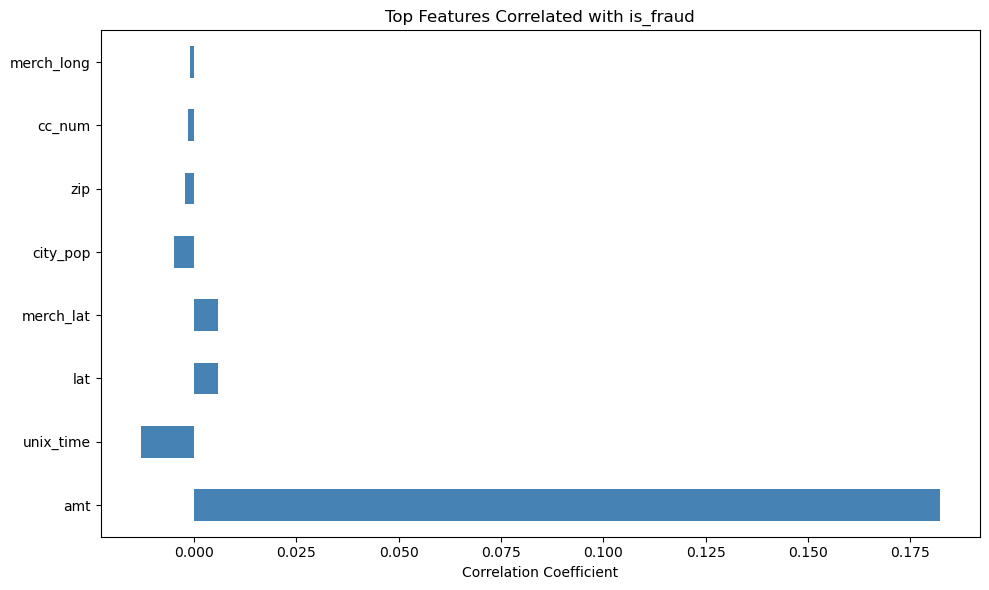

In [16]:
# Correlation analysis for numerical features
if len(numerical_features) > 1:
    print("CORRELATION ANALYSIS")
    print("="*50)
    
    # Calculate correlation matrix
    correlation_matrix = df[numerical_features].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated feature pairs
    print("\\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                high_corr_pairs.append((
                    correlation_matrix.columns[i], 
                    correlation_matrix.columns[j], 
                    corr_value
                ))
    
    if high_corr_pairs:
        for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"{feat1} - {feat2}: {corr:.3f}")
    else:
        print("No highly correlated feature pairs found.")
    
    # Correlation with target variable (if available)
    if 'target_col' in locals() and target_col in df.columns:
        print(f"\\nCorrelation with Target Variable ({target_col}):")
        target_corr = df[numerical_features + [target_col]].corr()[target_col].sort_values(key=abs, ascending=False)
        target_corr = target_corr.drop(target_col)  # Remove self-correlation
        print(target_corr.head(10))
        
        # Visualize top correlations with target
        top_features = target_corr.head(8).index.tolist()
        if top_features:
            plt.figure(figsize=(10, 6))
            target_corr.head(8).plot(kind='barh', color='steelblue')
            plt.title(f'Top Features Correlated with {target_col}')
            plt.xlabel('Correlation Coefficient')
            plt.tight_layout()
            plt.show()
else:
    print("Not enough numerical features for correlation analysis.")

## 8. Advanced Visualizations and Insights

Creating pairplot with 10000 samples for performance...


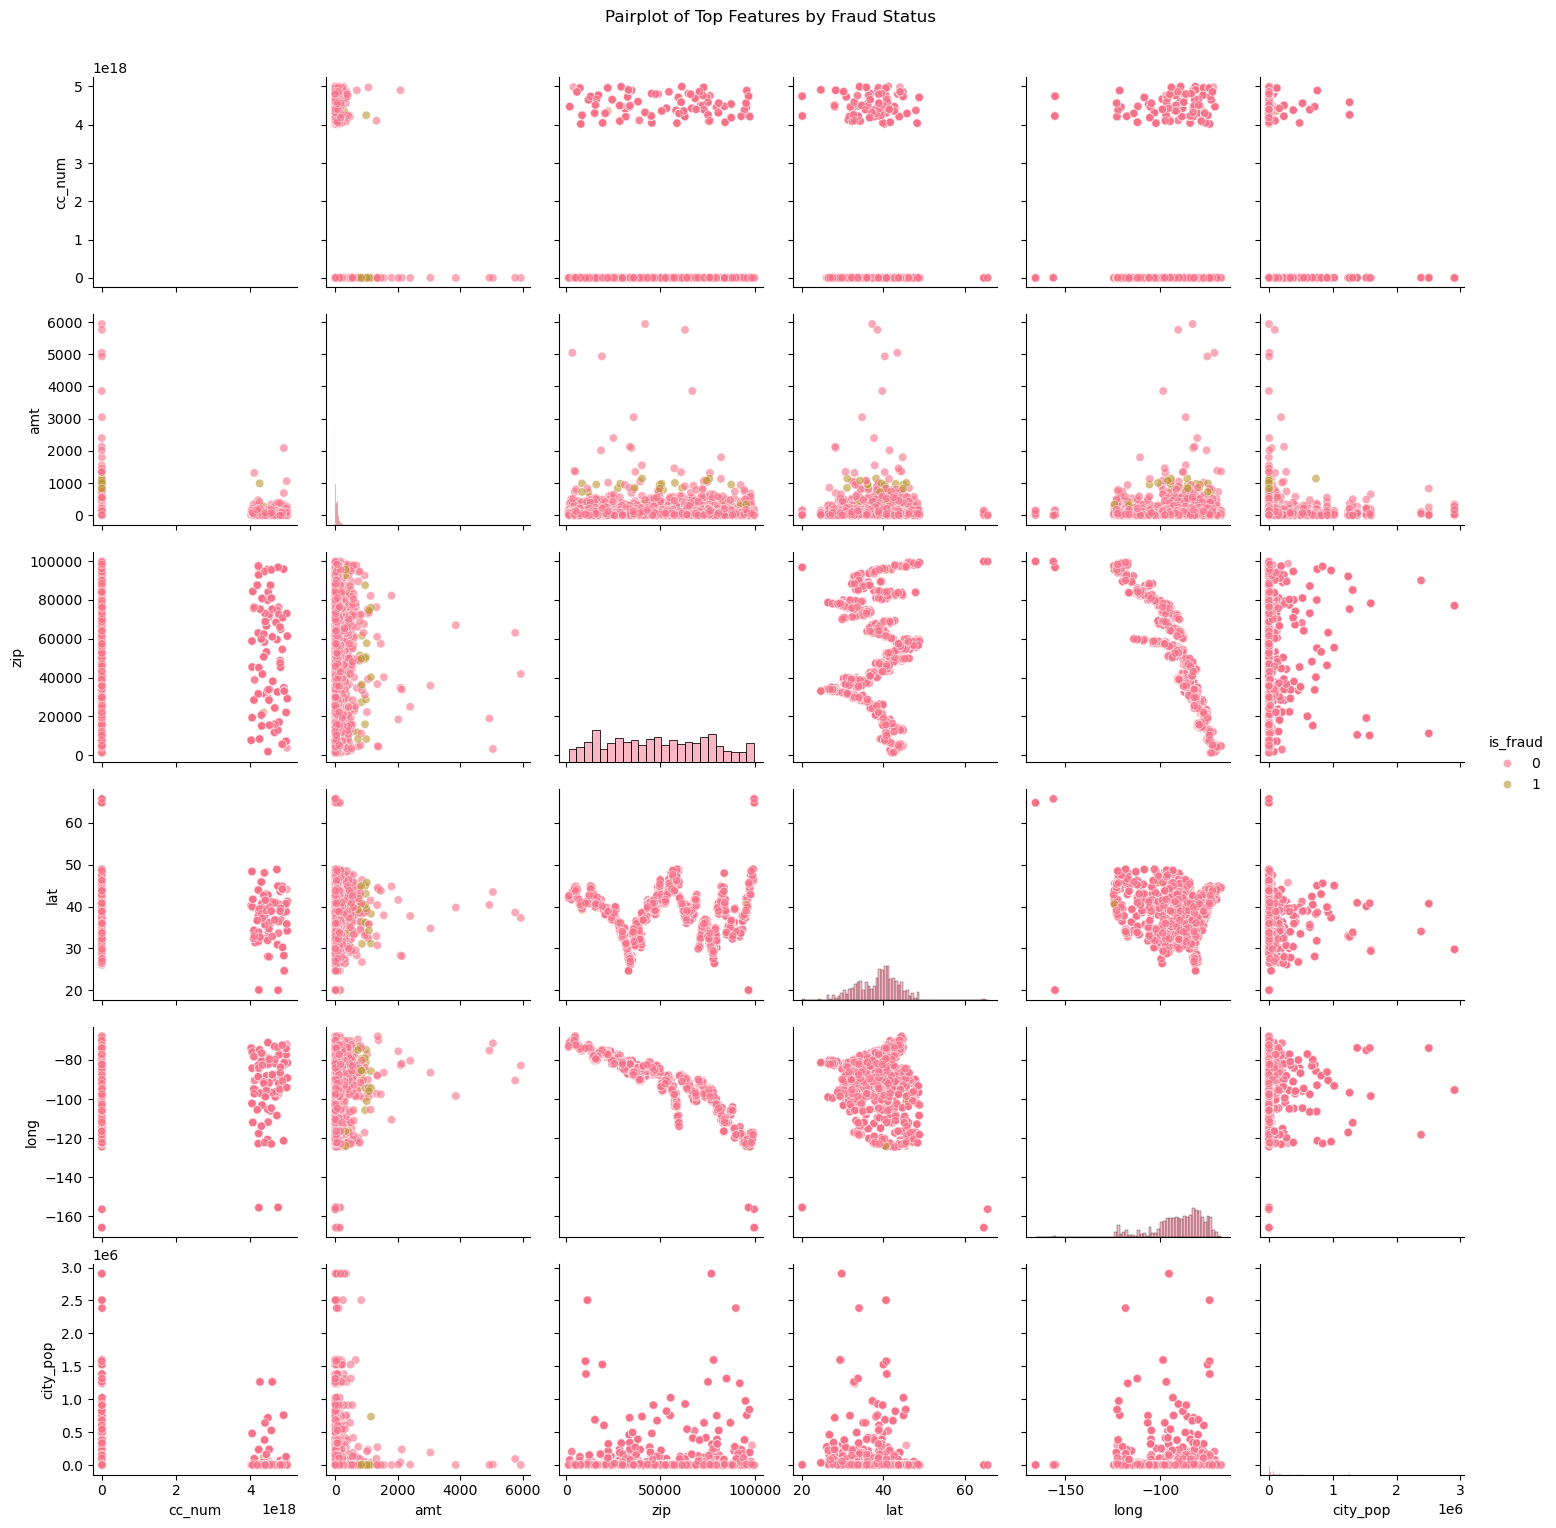

\nANALYSIS OF AMT
Amount statistics by fraud status:
           count    mean  median     std   min       max
is_fraud                                                
0         553574   67.61   47.15  152.47  1.00  22768.11
1           2145  528.36  371.94  392.75  1.78   1320.92


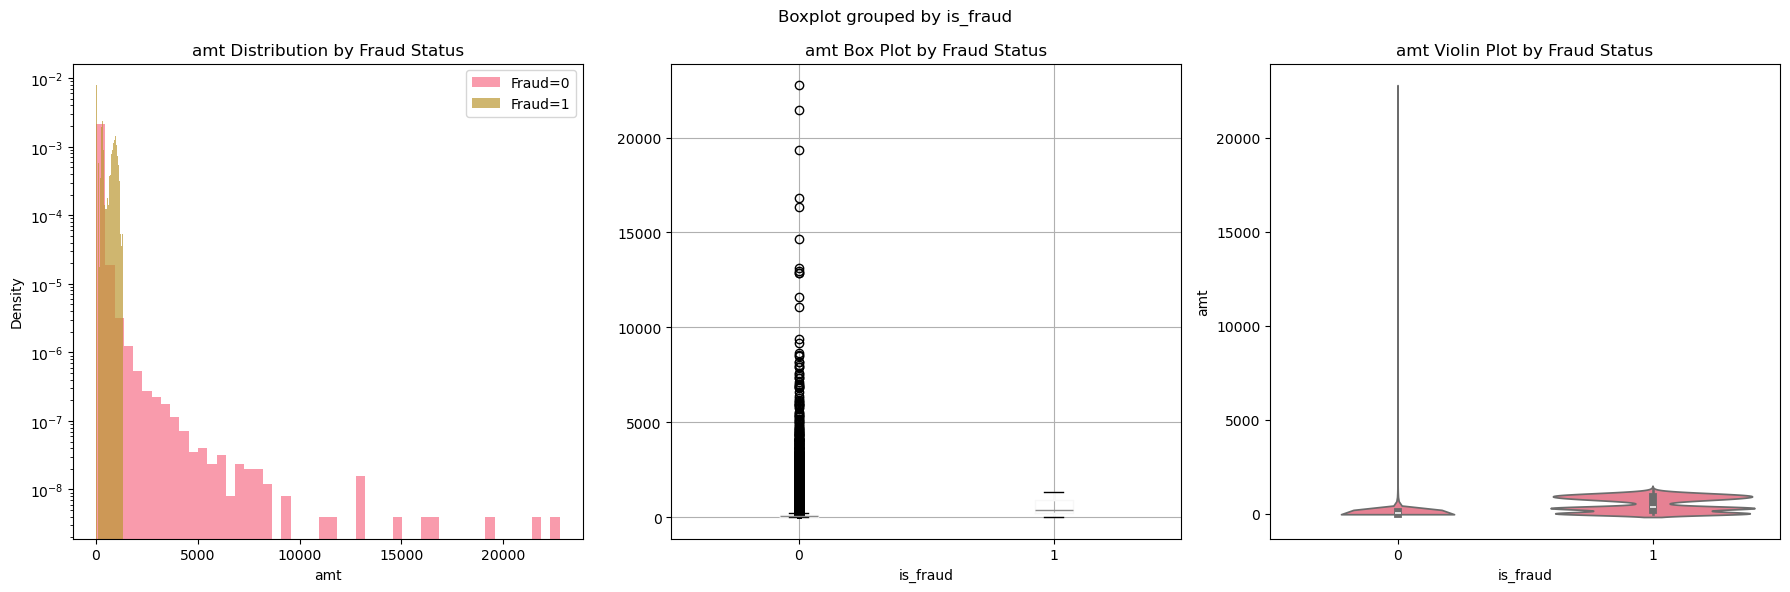

In [17]:
# Advanced visualizations
if 'target_col' in locals() and numerical_features:
    # Scatter plots for top correlated features with fraud
    top_features_for_viz = numerical_features[:6] if len(numerical_features) >= 6 else numerical_features
    
    # Pairplot for top features
    viz_features = top_features_for_viz + [target_col]
    sample_size = min(10000, len(df))  # Sample for performance
    df_sample = df[viz_features].sample(n=sample_size, random_state=42)
    
    print(f"Creating pairplot with {sample_size} samples for performance...")
    
    # Create pairplot
    g = sns.pairplot(df_sample, 
                     hue=target_col, 
                     diag_kind='hist',
                     plot_kws={'alpha': 0.6},
                     height=2.5)
    g.fig.suptitle('Pairplot of Top Features by Fraud Status', y=1.02)
    plt.show()

# Transaction amount analysis (common in fraud detection)
amount_candidates = [col for col in df.columns if any(keyword in col.lower() 
                    for keyword in ['amount', 'amt', 'value', 'price', 'cost'])]

if amount_candidates and 'target_col' in locals():
    amount_col = amount_candidates[0]
    print(f"\\nANALYSIS OF {amount_col.upper()}")
    print("="*50)
    
    # Basic statistics by fraud status
    amount_stats = df.groupby(target_col)[amount_col].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    print("Amount statistics by fraud status:")
    print(amount_stats)
    
    # Visualize amount distribution
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Histogram by fraud status
    for fraud_status in df[target_col].unique():
        subset = df[df[target_col] == fraud_status][amount_col]
        axes[0].hist(subset, bins=50, alpha=0.7, label=f'Fraud={fraud_status}', density=True)
    axes[0].set_title(f'{amount_col} Distribution by Fraud Status')
    axes[0].set_xlabel(amount_col)
    axes[0].set_ylabel('Density')
    axes[0].legend()
    axes[0].set_yscale('log')  # Log scale for better visualization
    
    # Box plot
    df.boxplot(column=amount_col, by=target_col, ax=axes[1])
    axes[1].set_title(f'{amount_col} Box Plot by Fraud Status')
    
    # Violin plot
    sns.violinplot(data=df, x=target_col, y=amount_col, ax=axes[2])
    axes[2].set_title(f'{amount_col} Violin Plot by Fraud Status')
    
    plt.tight_layout()
    plt.show()

elif amount_candidates:
    print(f"\\nFound amount column: {amount_candidates[0]}, but no target column identified for comparison.")

## 9. Statistical Tests and Insights

In [18]:
# Statistical tests to identify significant differences
if 'target_col' in locals() and numerical_features:
    print("STATISTICAL TESTS FOR FEATURE SIGNIFICANCE")
    print("="*50)
    
    # Perform t-tests or Mann-Whitney U tests for numerical features
    from scipy.stats import ttest_ind, mannwhitneyu
    
    test_results = []
    
    for feature in numerical_features[:10]:  # Limit to first 10 features
        # Get data for fraud and non-fraud cases
        fraud_data = df[df[target_col] == 1][feature].dropna()
        non_fraud_data = df[df[target_col] == 0][feature].dropna()
        
        if len(fraud_data) > 0 and len(non_fraud_data) > 0:
            # Perform Mann-Whitney U test (non-parametric)
            try:
                statistic, p_value = mannwhitneyu(fraud_data, non_fraud_data, alternative='two-sided')
                
                # Calculate effect size (Cohen's d approximation)
                mean_diff = fraud_data.mean() - non_fraud_data.mean()
                pooled_std = np.sqrt(((len(fraud_data) - 1) * fraud_data.var() + 
                                     (len(non_fraud_data) - 1) * non_fraud_data.var()) / 
                                     (len(fraud_data) + len(non_fraud_data) - 2))
                
                effect_size = mean_diff / pooled_std if pooled_std != 0 else 0
                
                test_results.append({
                    'Feature': feature,
                    'Fraud_Mean': fraud_data.mean(),
                    'Non_Fraud_Mean': non_fraud_data.mean(),
                    'P_Value': p_value,
                    'Effect_Size': effect_size,
                    'Significant': 'Yes' if p_value < 0.05 else 'No'
                })
            except Exception as e:
                print(f"Error testing {feature}: {e}")
    
    if test_results:
        results_df = pd.DataFrame(test_results)
        results_df = results_df.sort_values('P_Value')
        
        print("Statistical test results (Mann-Whitney U test):")
        print("Features sorted by p-value (most significant first):")
        print(results_df.round(6))
        
        # Count significant features
        significant_features = results_df[results_df['Significant'] == 'Yes']['Feature'].tolist()
        print(f"\\nNumber of statistically significant features (p < 0.05): {len(significant_features)}")
        print(f"Significant features: {significant_features[:10]}")  # Show first 10

# Chi-square test for categorical features
if 'target_col' in locals() and categorical_features:
    print("\\n\\nCHI-SQUARE TESTS FOR CATEGORICAL FEATURES")
    print("="*50)
    
    chi2_results = []
    
    for feature in categorical_features[:5]:  # Test first 5 categorical features
        try:
            # Create contingency table
            contingency_table = pd.crosstab(df[feature], df[target_col])
            
            # Perform chi-square test
            chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
            
            # Calculate Cramér's V (effect size for categorical variables)
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
            
            chi2_results.append({
                'Feature': feature,
                'Chi2_Statistic': chi2_stat,
                'P_Value': p_value,
                'Degrees_of_Freedom': dof,
                'Cramers_V': cramers_v,
                'Significant': 'Yes' if p_value < 0.05 else 'No'
            })
            
        except Exception as e:
            print(f"Error testing {feature}: {e}")
    
    if chi2_results:
        chi2_df = pd.DataFrame(chi2_results)
        chi2_df = chi2_df.sort_values('P_Value')
        
        print("Chi-square test results for categorical features:")
        print(chi2_df.round(6))
        
        significant_categorical = chi2_df[chi2_df['Significant'] == 'Yes']['Feature'].tolist()
        print(f"\\nSignificant categorical features: {significant_categorical}")

STATISTICAL TESTS FOR FEATURE SIGNIFICANCE
Statistical test results (Mann-Whitney U test):
Features sorted by p-value (most significant first):
      Feature    Fraud_Mean  Non_Fraud_Mean   P_Value  Effect_Size Significant
1         amt  5.283565e+02    6.761441e+01  0.000000     2.989494         Yes
6   unix_time  1.379587e+09    1.380683e+09  0.000000    -0.210733         Yes
0      cc_num  3.854274e+17    4.179643e+17  0.000000    -0.024840         Yes
3         lat  3.901997e+01    3.854141e+01  0.000144     0.094555         Yes
7   merch_lat  3.901862e+01    3.854095e+01  0.000177     0.093738         Yes
5    city_pop  6.452932e+04    8.831369e+04  0.004913    -0.079179         Yes
2         zip  4.786290e+04    4.884642e+04  0.053506    -0.036623          No
8  merch_long -9.046522e+01   -9.023047e+01  0.753385    -0.017094          No
4        long -9.044556e+01   -9.023050e+01  0.819995    -0.015673          No
\nNumber of statistically significant features (p < 0.05): 6
Signi

## 10. Summary and Key Insights

In [19]:
# Generate comprehensive summary
print("COMPREHENSIVE EDA SUMMARY")
print("="*60)

# Dataset overview
print(f"📊 DATASET OVERVIEW")
print(f"   • Total rows: {df.shape[0]:,}")
print(f"   • Total columns: {df.shape[1]:,}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"   • Missing values: {df.isnull().sum().sum():,} ({(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%)")
print(f"   • Duplicate rows: {df.duplicated().sum():,}")

# Feature summary
print(f"\\n🔢 FEATURES SUMMARY")
print(f"   • Numerical features: {len(numerical_features)}")
print(f"   • Categorical features: {len(categorical_features)}")

# Target variable summary (if identified)
if 'target_col' in locals():
    fraud_rate = df[target_col].mean() * 100
    print(f"\\n🎯 TARGET VARIABLE ({target_col})")
    print(f"   • Fraud rate: {fraud_rate:.2f}%")
    print(f"   • Class balance: {'Severely imbalanced' if fraud_rate < 5 else 'Moderately imbalanced' if fraud_rate < 20 else 'Balanced'}")

# Key insights placeholder
print(f"\\n💡 KEY INSIGHTS")
insights = [
    "• Run the notebook to discover specific patterns in your fraud data",
    "• Temporal analysis will reveal time-based fraud patterns",
    "• Correlation analysis will identify important feature relationships",
    "• Statistical tests will confirm significant differences between fraud/legitimate transactions",
    "• Amount analysis will show typical fraud transaction characteristics"
]

for insight in insights:
    print(f"   {insight}")

print(f"\\n🔍 NEXT STEPS")
next_steps = [
    "• Feature engineering based on discovered patterns",
    "• Handle class imbalance if severely imbalanced",
    "• Consider ensemble methods for fraud detection",
    "• Validate insights with domain experts",
    "• Prepare features for machine learning models"
]

for step in next_steps:
    print(f"   {step}")

print("\\n" + "="*60)
print("EDA COMPLETE! 🎉")
print("Review the visualizations and statistical tests above for detailed insights.")
print("="*60)

COMPREHENSIVE EDA SUMMARY
📊 DATASET OVERVIEW
   • Total rows: 555,719
   • Total columns: 22
   • Memory usage: 439.3 MB
   • Missing values: 0 (0.00%)
   • Duplicate rows: 0
\n🔢 FEATURES SUMMARY
   • Numerical features: 9
   • Categorical features: 12
\n🎯 TARGET VARIABLE (is_fraud)
   • Fraud rate: 0.39%
   • Class balance: Severely imbalanced
\n💡 KEY INSIGHTS
   • Run the notebook to discover specific patterns in your fraud data
   • Temporal analysis will reveal time-based fraud patterns
   • Correlation analysis will identify important feature relationships
   • Statistical tests will confirm significant differences between fraud/legitimate transactions
   • Amount analysis will show typical fraud transaction characteristics
\n🔍 NEXT STEPS
   • Feature engineering based on discovered patterns
   • Handle class imbalance if severely imbalanced
   • Consider ensemble methods for fraud detection
   • Validate insights with domain experts
   • Prepare features for machine learning mode